In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

#### 本地读取CSV数据

In [2]:
data = pd.read_csv("./data/8.Advertising.csv")

In [3]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
x = data[["TV","Radio","Newspaper"]]

In [5]:
y = data[["Sales"]]

#### 绘图1：单列x与y的相关性 

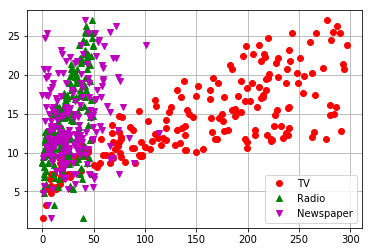

In [6]:
plt.plot(data["TV"],y, "ro", label="TV")
plt.plot(data["Radio"],y, "g^", label="Radio")
plt.plot(data["Newspaper"],y, "mv", label="Newspaper")
plt.legend(loc="lower right")
plt.grid()
plt.show()

#### 绘制2：x与y相关性，分开绘图 
    plt.subplot(311) 
    表示在当前图添加子图：
        子图所在形状为：3行1列的网格中 最后的1为index即子图位置

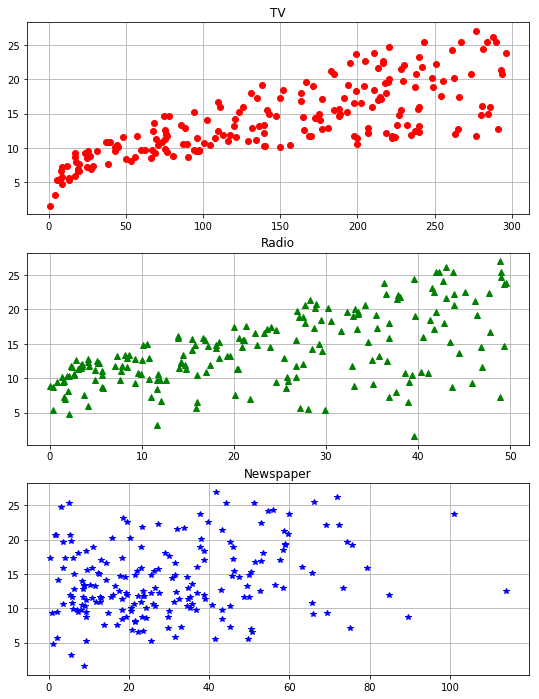

In [7]:
plt.figure(figsize=(9,12))
plt.subplot(311)
plt.plot(data["TV"], y, "ro")
plt.title("TV")
plt.grid()

plt.subplot(312)
plt.plot(data["Radio"], y, "g^")
plt.title("Radio")
plt.grid()

plt.subplot(313)
plt.plot(data["Newspaper"], y, "b*")
plt.title("Newspaper")
plt.grid()
plt.show()

#### 分割数据

In [8]:
# x = x[["TV", "Radio"]]  # 出去相关性小的特征
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.25, 
                                                   random_state=1)

#### 标准化数据 

In [9]:
# std = StandardScaler()
# x_train = std.fit_transform(x_train)
# x_test = std.transform(x_test)
# y_train = std.fit_transform(y_train)
# y_test = std.transform(y_test)

#### 构建模型 
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
fit_intercept: 是否计算此模型的截距;
normalize: fit_intercept设置为False 时，将忽略此参数。如果为True，则回归量X将在回归之前通过减去平均值并除以l2范数来归一化。如果您希望标准化，请 在使用估算器sklearn.preprocessing.StandardScaler之前fit使用normalize=False。
n_jobs: 用于计算的作业数。这只会为n_targets> 1和足够大的问题提供加速。 -1表示使用所有处理器

In [10]:
lgresssion = LinearRegression()
lgresssion.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
print("线性回归问题的估计系数：", lgresssion.coef_)  # 计算出来的 参数：θ
print("线性模型中的独立项：", lgresssion.intercept_)  # 计算出来的： 常数项，或叫做 θ下表0

线性回归问题的估计系数： [[0.04656457 0.17915812 0.00345046]]
线性模型中的独立项： [2.87696662]


In [12]:
predict = lgresssion.predict(x_test)
mse = np.average((predict-y_test)**2) # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
print("预测的准确率：", lgresssion.score(x_test, y_test))
print("均方误差：", mse)
print("Root均方误差差：", rmse)

预测的准确率： 0.9156213613792233
均方误差： 1.9730456202283368
Root均方误差差： 1.404651423032895


#### 画图：预测值与实际值之间的折线图 

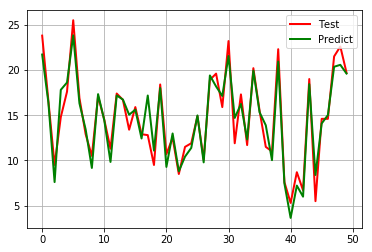

In [13]:
 t = np.arange(len(x_test))
plt.plot(t, y_test, 'r-', linewidth=2, label='Test')
plt.plot(t, predict, 'g-', linewidth=2, label='Predict')
plt.legend(loc='upper right')
plt.grid()
plt.show()